# Import Libraries

In [3]:
import os
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as plt

# Exploring data and cleaning data

In [5]:
os.getcwd()

'C:\\Users\\reddyl\\Jupytertests\\Capstone - 1'

In [6]:
ls


 Volume in drive C is OSDisk
 Volume Serial Number is 6856-3941

 Directory of C:\Users\reddyl\Jupytertests\Capstone - 1

06/25/2020  06:48 PM    <DIR>          .
06/25/2020  06:48 PM    <DIR>          ..
06/24/2020  04:03 PM    <DIR>          .ipynb_checkpoints
06/25/2020  06:48 PM            69,367 Capstone Project -1 Data Wrangling.ipynb
06/25/2020  06:44 PM    <DIR>          data
06/24/2020  05:48 PM         8,405,196 members_modified.csv
11/13/2017  12:38 PM       427,921,437 members_v3.csv
09/14/2017  11:23 AM        46,667,771 train.csv
06/24/2020  05:07 PM         6,646,623 train_modified.csv
09/14/2017  11:28 AM     1,729,298,376 transactions.csv
06/24/2020  06:34 PM       177,172,573 trasactions_modified.csv
09/14/2017  12:43 PM    30,514,081,415 user_logs.csv
11/03/2017  04:32 PM     1,431,465,728 user_logs_v2.csv
06/25/2020  06:42 PM       685,951,221 user_logs_v2.csv.7z
              10 File(s) 35,027,679,707 bytes
               4 Dir(s)  230,760,042,496 bytes free


# Train data set
Train data set has user ids and whether they have churned or not

.is_churn = 1 means churn      
.is_churn = 0 means renewal

In [7]:
traindf = pd.read_csv('train.csv')

In [8]:
traindf.head()

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [9]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992931 entries, 0 to 992930
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msno      992931 non-null  object
 1   is_churn  992931 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.2+ MB


In [10]:
traindf.describe()

,is_churn
count,992931.000000
mean,0.063923
std,0.244616
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Train data set has churn information for about 992931 users and looks like majority (nearly 94%) of the members renewed their subscription.
To make our training set meaningful to predict a model, lets downsample majority group to ensure equal representation of the churn and non-churn data.

In [11]:
churn = traindf[traindf.is_churn == 1]
non_churn = traindf[traindf.is_churn == 0]
#non_churn.head()

#sample non_churn group
non_churn_sample = non_churn.msno.sample(n=75000, random_state=3).tolist()
non_churn = traindf[traindf.msno.isin(non_churn_sample)]

#concatenate both dataframes
traindf = pd.concat([churn,non_churn])
traindf.reset_index(drop=True, inplace = True)
#non_churn_sample

In [12]:
traindf.describe()

,is_churn
count,138471.000000
mean,0.458370
std,0.498266
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [13]:
traindf.to_csv('train_modified.csv',index=False)

The train data has 138471 users now without any bias

# Members data

.msno
.city
.bd: age.  
.gender
.registered_via: 
.registration_init_time 
 

In [26]:
membersdf = pd.read_csv('members_v3.csv')

In [27]:
membersdf.head()


,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [29]:
membersdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   city                    int64 
 2   bd                      int64 
 3   gender                  object
 4   registered_via          int64 
 5   registration_init_time  int64 
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


Members data set provides users information for 6769473 users
it has ample data when compared to what we have in train dataset. Lets filter down the data set to only those in the train data. 

In [33]:
membersdf = membersdf[membersdf.msno.isin(traindf.msno.tolist())]
membersdf.reset_index(drop=True, inplace=True)
membersdf.info()
membersdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123815 entries, 0 to 123814
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   msno                    123815 non-null  object
 1   city                    123815 non-null  int64 
 2   bd                      123815 non-null  int64 
 3   gender                  63206 non-null   object
 4   registered_via          123815 non-null  int64 
 5   registration_init_time  123815 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 5.7+ MB


,msno,city,bd,gender,registered_via,registration_init_time
0,WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=,5,34,male,9,20110916
1,Z6WIOK9vXy+e2XDBiioNAxuZ0ScXSU/Ebq4tUwqVSrE=,22,38,female,9,20110929
2,i4kmzPli+nl4XagzznO+oCcPeXfjcLSKIn8xE9oGU5E=,4,58,male,9,20111006
3,7oCpSPj4+SdVJLfDRc+tN5HLp2R1DRozaWsTpbLTz5g=,15,21,female,3,20141020
4,bPHi7VPQkMtdeIqJAktzYSITpRSt9F9mCdhddPTSlOY=,15,17,female,3,20141021


Mmembers data set has 123815 users data. Another observations are we do not have the all the members data compared to trainset, and missing data in gender column.

There are few columns which are in wrong data type and correct data type should be

1. registration_init_time - Datetime object
2. city - Categorical
3. gender - Categorical
4. registration_via - Categorical

In [35]:
membersdf['registration_init_time'] = membersdf.registration_init_time.apply(lambda x: datetime.strptime(str(x), "%Y%m%d").date() if pd.notnull(x) else None)
membersdf['city'] = membersdf.city.astype('category')
membersdf['gender'] = membersdf.gender.astype('category')
membersdf['registered_via'] = membersdf.registered_via.astype('category')

In [36]:
membersdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123815 entries, 0 to 123814
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   msno                    123815 non-null  object  
 1   city                    123815 non-null  category
 2   bd                      123815 non-null  int64   
 3   gender                  63206 non-null   category
 4   registered_via          123815 non-null  category
 5   registration_init_time  123815 non-null  object  
dtypes: category(3), int64(1), object(2)
memory usage: 3.2+ MB


count    123815.000000
mean         14.831555
std          18.249042
min         -48.000000
25%           0.000000
50%          17.000000
75%          27.000000
max        1052.000000
Name: bd, dtype: float64


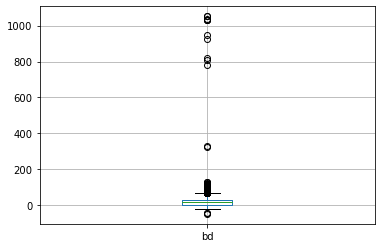

In [39]:
print(membersdf.bd.describe())
membersdf.boxplot(column='bd')
plt.show()

Based on the boxplot above, the data contains users who are in age range from -48 to 1052 which does not make any sense. 
Lets make the age range from 1 to 100 to make sure not to skew the data and fill missing data with 0

In [40]:
membersdf['bd'] = membersdf.bd.apply(lambda x: int(x) if x in range(1,101) else None)

In [42]:
membersdf.describe()

,bd
count,63188.000000
mean,28.764370
std,8.851143
min,1.000000
25%,22.000000
50%,27.000000
75%,33.000000
max,100.000000


In [45]:
membersdf.to_csv('members_modified.csv',index=False)

# Transaction data

Transaction data set contains

.msno: user id
.payment_method_id: payment method
.payment_plan_days: length of membership plan in days
.plan_list_price: in New Taiwan Dollar (NTD)
.actual_amount_paid: in New Taiwan Dollar (NTD)
.is_auto_renew
.transaction_date: format %Y%m%d
.membership_expire_date: format %Y%m%d
.is_cancel: whether or not the user canceled the membership in this transaction

In [46]:
transactionsdf = pd.read_csv('transactions.csv')
 

NameError: name 'transactiondf' is not defined

In [47]:
transactionsdf.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0


In [48]:
transactionsdf.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,2.154775e+07,2.154775e+07,2.154775e+07,2.154775e+07,2.154775e+07,2.154775e+07,2.154775e+07,2.154775e+07
mean,3.893310e+01,3.133906e+01,1.398850e+02,1.419873e+02,8.519661e-01,2.015760e+07,2.015862e+07,3.976523e-02
std,3.507936e+00,3.035649e+01,1.309647e+02,1.324824e+02,3.551336e-01,6.155979e+03,7.755753e+03,1.954072e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,1.970010e+07,0.000000e+00
25%,3.800000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.015091e+07,2.015102e+07,0.000000e+00
50%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016032e+07,2.016043e+07,0.000000e+00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016092e+07,2.016103e+07,0.000000e+00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017023e+07,2.017033e+07,1.000000e+00


In [49]:
transactionsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21547746 entries, 0 to 21547745
Data columns (total 9 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   payment_method_id       int64 
 2   payment_plan_days       int64 
 3   plan_list_price         int64 
 4   actual_amount_paid      int64 
 5   is_auto_renew           int64 
 6   transaction_date        int64 
 7   membership_expire_date  int64 
 8   is_cancel               int64 
dtypes: int64(8), object(1)
memory usage: 1.4+ GB


In [50]:
len(set(transactionsdf.msno))

2363626

Transactions data has 21547746 transactions and it seems that a user can make multiple transactions, but this data set has 2363626 users.
Lets extract the data only needs in train data

In [52]:
transactionsdf = transactionsdf[transactionsdf.msno.isin(traindf.msno.tolist())]
transactionsdf.reset_index(drop=True, inplace=True)
transactionsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909677 entries, 0 to 1909676
Data columns (total 9 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   payment_method_id       int64 
 2   payment_plan_days       int64 
 3   plan_list_price         int64 
 4   actual_amount_paid      int64 
 5   is_auto_renew           int64 
 6   transaction_date        int64 
 7   membership_expire_date  int64 
 8   is_cancel               int64 
dtypes: int64(8), object(1)
memory usage: 131.1+ MB


In [54]:
len(set(transactionsdf.msno))

138471

There are few columns which are in wrong data type and should be of below data type
.payment_method_id - Categorical
.is_auto_renew - Categrorical
.transaction_date - Datetime object
.member_expire_date - Datetime object
.is_cancel - Categorical

In [55]:

from datetime import datetime
cat = ['payment_method_id', 'is_auto_renew', 'is_cancel']
for col in cat:
    transactionsdf[col] = transactionsdf[col].astype('category')

transactionsdf['transaction_date'] = transactionsdf['transaction_date'].apply(lambda x: datetime.strptime(str(x), "%Y%m%d").date() if pd.notnull(x) else None)
transactionsdf['membership_expire_date'] = transactionsdf['membership_expire_date'].apply(lambda x: datetime.strptime(str(x), "%Y%m%d").date() if pd.notnull(x) else None)

In [56]:
transactionsdf.describe()

,payment_plan_days,plan_list_price,actual_amount_paid
count,1.909677e+06,1.909677e+06,1.909677e+06
mean,3.147768e+01,1.407167e+02,1.445365e+02
std,2.691498e+01,1.157037e+02,1.138081e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+01,9.900000e+01,9.900000e+01
50%,3.000000e+01,1.490000e+02,1.490000e+02
75%,3.000000e+01,1.490000e+02,1.490000e+02
max,4.500000e+02,2.000000e+03,2.000000e+03


Looks like there is no missing data but minimum value for all 3 columns are 0, Lets investigate further

In [57]:
transactionsdf[transactionsdf.payment_plan_days == 0].head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
244,+PDRqxCUcwjf0pnshEarm4OLSiIwCnleg8CGDYQRSLk=,34,0,0,149,1,2015-08-31,2015-09-30,0
245,FvaiCA/DAbGupjQkBTcIXgGH7gSIX5erXWkKU6brrDo=,34,0,0,149,1,2015-08-31,2015-09-30,0
246,GjgFeNhx91KoyPHvYryrRcMhrQ3Q++LWrKD+OtEd68s=,31,0,0,149,1,2015-08-31,2015-09-30,0
249,vEi+fKPqQOfxWc5XWIXNrIWGfBlWyM2uz5kNVgALzgg=,33,0,0,149,1,2015-06-30,2015-07-31,0
255,OhSuMZNvVEA4Wx2/t7sJc08w98GZGJyE+7RNVxd9Or8=,34,0,0,149,1,2015-07-31,2015-08-31,0


In [58]:
transactionsdf[transactionsdf.actual_amount_paid == 0].head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
31,nttAL0YZASkTcHZH0nX7CsS1oUc5wLqMeJUqQSepslU=,35,7,0,0,0,2016-02-25,2016-03-25,0
111,lcQXwJNfBYda++AXuj9AzhWIMNyT52P2p1B1X4fRGDY=,35,7,0,0,0,2016-11-13,2016-11-20,0
114,TQBYDWyUqupf4EdTxSnO/4autGakpwxZJWNSSy25ROg=,38,7,0,0,0,2016-10-28,2017-03-19,0
350,6KrgpnP6HHn78FFbeTXG9kbR2XALAWMG1GrJSoLiHl8=,35,7,0,0,0,2015-06-07,2015-06-15,0
425,WWfFnkLCRMu6rA98VMHuQ7wAjlw4yI7wimym/tcUHw0=,35,7,0,0,0,2015-06-09,2015-06-15,0


These 0 values actually represents value. And may be those paying 0 NTD may be on free trail period and some users did not choose a set plan and paying by the month.

In [59]:
transactionsdf.to_csv('trasactions_modified.csv')

# User log data


The user log dataset describes listening behaviors of a user at the daily level.

msno: user id
date: format %Y%m%d
num_25: # of songs played less than 25% of the song length
num_50: # of songs played between 25% to 50% of the song length
num_75: # of songs played between 50% to 75% of of the song length
num_985: # of songs played between 75% to 98.5% of the song length
num_100: # of songs played over 98.5% of the song length
num_unq: # of unique songs played
total_secs: total seconds played

The data set is large, lets process it in chunks and try to use only logs of those in train set is needed.

In [14]:
user_logsdf = pd.DataFrame()
chunksize = 100000
for chunk in pd.read_csv('user_logs_v2.csv', chunksize=chunksize):
    df = chunk[chunk.msno.isin(traindf.msno.tolist())]
    user_logsdf = user_logsdf.append(df)
user_logsdf.reset_index(drop=True, inplace=True)


In [15]:
user_logsdf.head()


,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,qR/ndQ5B+1cY+c9ihwLoiz+RFiqEnGyQKo32ZErEVKo=,20170331,3,0,0,0,39,41,9786.842
1,N6ch5ArfJixq9mvARJv9ip1D11uvDVazz6Qup5mX7DI=,20170330,9,1,0,0,18,26,4920.255
2,Dde9YoZqShj9wZAgEm0mc+V995QOExh+1WRlL9oMQJg=,20170318,34,13,7,6,83,74,24825.041
3,J0BhO71yiNuIbyK+QkzR2Ih1PXarheWYO3EcZIQk5NQ=,20170316,0,0,0,0,3,3,697.004
4,tVOiYmrUNU0Qdc5VewEp9UzhUQXOO1VDC4APcmSjSLU=,20170322,0,0,0,0,189,72,37483.038


In [17]:
user_logsdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379990 entries, 0 to 1379989
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   msno        1379990 non-null  object 
 1   date        1379990 non-null  int64  
 2   num_25      1379990 non-null  int64  
 3   num_50      1379990 non-null  int64  
 4   num_75      1379990 non-null  int64  
 5   num_985     1379990 non-null  int64  
 6   num_100     1379990 non-null  int64  
 7   num_unq     1379990 non-null  int64  
 8   total_secs  1379990 non-null  float64
dtypes: float64(1), int64(7), object(1)
memory usage: 94.8+ MB


In [19]:
len(set(user_logsdf.msno))

79745

we have 79745 rows of unique users out of 1379990 rows of data.
date column is in wrong foramt. Lets change it.

In [21]:
from datetime import datetime
user_logsdf['date'] = user_logsdf['date'].astype('int')
user_logsdf['date'] = user_logsdf['date'].apply(lambda x: datetime.strptime(str(x), "%Y%m%d").date() if pd.notnull(x) else None)

In [23]:
user_logsdf.describe()


,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1.379990e+06,1.379990e+06,1.379990e+06,1.379990e+06,1.379990e+06,1.379990e+06,1.379990e+06
mean,6.204550e+00,1.492095e+00,9.357981e-01,1.060751e+00,2.995430e+01,2.887755e+01,7.827083e+03
std,1.364064e+01,3.691331e+00,1.855967e+00,2.673492e+00,3.944598e+01,3.173134e+01,9.603077e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.900000e-02
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,1.967771e+03
50%,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.800000e+01,4.588116e+03
75%,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.700000e+01,3.800000e+01,9.810413e+03
max,5.639000e+03,4.610000e+02,2.070000e+02,2.600000e+02,5.216000e+03,1.364000e+03,1.233170e+06


Looks like there are no missing values and consider data cleaning is complete.